# <b> Boundary detection </b>
In this notebook we are going to detect the boundary of filled and unfilled shapes

In [94]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [149]:
def generate_input():
    image = Image.open('shapes/nano.jpg')
    image = ImageOps.grayscale(image)
    data = np.asarray(image)
    on = (data >= 128)
    new = np.zeros(shape=data.shape)
    new[on] = 255
    new[~on] = 0
        
    return new, new.shape
        

In [150]:
def plot_boundary_detection():
    input_img, pix = generate_input()
    
    #kernels
    vertical_kernel = tf.constant([[1,0,-1],
                                   [1,0,-1],
                                   [1,0,-1]], dtype='int32')

    horizontal_kernel = tf.constant([[1,1,1],
                                     [0,0,0],
                                     [-1,-1,-1]], dtype='int32')

    laplacial_kernel = tf.constant([[0,1,0],
                                    [1,-4,1],
                                    [0,1,0]], dtype='int32')
    
    # tensor conversion for convolution
    # Laplace kernel takes care of both vertical and horizontal edges
    input_img_tensor = tf.constant(input_img, dtype='int32')
    laplacian_output = tf.nn.convolution(input=tf.reshape(input_img_tensor, [1,pix[0],pix[1],1]),
                                         filters=tf.reshape(laplacial_kernel, [3,3,1,1]))

    vertical_output = tf.nn.convolution(input=tf.reshape(input_img_tensor, [1,pix[0],pix[1],1]),
                                        filters=tf.reshape(vertical_kernel, [3,3,1,1]))
    
    horizontal_output = tf.nn.convolution(input=tf.reshape(input_img_tensor, [1,pix[0],pix[1],1]),
                                          filters=tf.reshape(horizontal_kernel, [3,3,1,1]))
    
    #array conversion for plotting
    v_output_img = tf.squeeze(vertical_output).numpy()
    h_output_img = tf.squeeze(horizontal_output).numpy()
    l_output_img = tf.squeeze(laplacian_output).numpy()
    vh_output_img = v_output_img+l_output_img
    vh_output_img = vh_output_img/2
    
    fig, axs = plt.subplots(1,4, figsize=(20,20))

    axs[0].imshow(input_img, cmap='binary')
    axs[0].axis('off')
    axs[0].set(title='original')
    
    axs[1].imshow(v_output_img, cmap='binary')
    axs[1].axis('off')
    axs[1].set(title='V')
    
    axs[2].imshow(h_output_img, cmap='binary')
    axs[2].axis('off')
    axs[2].set(title='H')
    
    axs[3].imshow(vh_output_img, cmap='binary')
    axs[3].axis('off')
    axs[3].set(title='VH')
    
    fig.patch.set(facecolor='white')

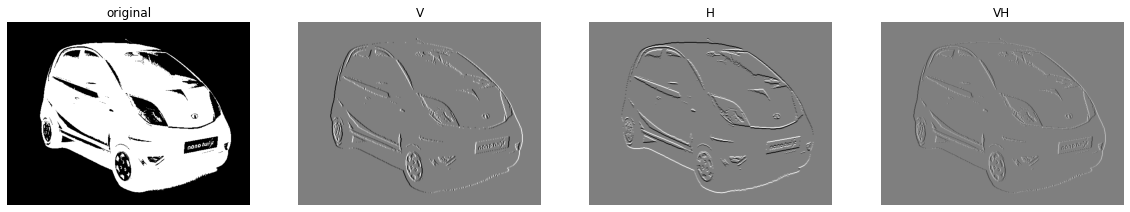

In [151]:
plot_boundary_detection()